In [218]:
#libs
import pandas as pd 
import os 
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
# Importando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pytz

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM, Dropout
#from sklearn.preprocessing import MinMaxScaler
import math

from bcb import currency
from bcb import sgs

import plotly.graph_objects as go

import seaborn as sns
import investpy

In [219]:
search_results = investpy.search_quotes(text = 'BGI', 
                                        products= ['commodities'], 
                                        countries= ['brazil'], 
                                        n_results = 50)

for search_result in search_results:
  print(search_result)

{"id_": 964528, "name": "Live Cattle Futures", "symbol": "BGIc1", "country": null, "tag": "/commodities/live-cattle?cid=964528", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 1181094, "name": "Live Cattle Futures", "symbol": "BGIc2", "country": null, "tag": "/commodities/live-cattle?cid=1181094", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 1181095, "name": "Live Cattle Futures", "symbol": "BGIc3", "country": null, "tag": "/commodities/live-cattle?cid=1181095", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [220]:
#Podemos caputrar a informação de linhas acima ou abaixo de uma linha específica usando o método pd.shift()
def constroi_features_defasadas(base,lista_features,defasagem_maxima):
    # Constrói features defasadas com base na base original
    # Copia a base
    base_cop = base.copy()
    for feat in lista_features:       
        for i in range(1,defasagem_maxima+1):
            base_cop[str(feat)+'_def_'+str(i)] = base_cop[feat].shift(i)
    return base_cop

In [221]:
boi_br = search_result.retrieve_historical_data(from_date = '01/01/2019', to_date = '01/08/2022')

In [222]:
boi_br.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2019-11-07,194.0,197.30,194.0,193.85,1664,0.23
2019-11-08,193.6,195.50,192.8,195.10,1656,0.64
2019-11-11,195.0,198.90,195.0,198.40,691,1.69
2019-11-12,198.5,201.45,198.0,200.95,498,1.29
2019-11-13,200.6,207.95,200.6,208.95,1379,3.98


In [223]:
boi_br.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change Pct'], dtype='object')

In [224]:
boi_br_eng = constroi_features_defasadas(boi_br,['Open', 'High', 'Low', 'Volume', 'Change Pct'],15)

In [225]:
print('Colunas antes do feature engineering: {}'.format(boi_br.shape[-1]))
print('Colunas antes do feature engineering: {}'.format(boi_br_eng.shape[-1]))

Colunas antes do feature engineering: 6
Colunas antes do feature engineering: 81


In [226]:
boi_br_eng

,Open,High,Low,Close,Volume,Change Pct,Open_def_1,Open_def_2,Open_def_3,Open_def_4,...,Change Pct_def_6,Change Pct_def_7,Change Pct_def_8,Change Pct_def_9,Change Pct_def_10,Change Pct_def_11,Change Pct_def_12,Change Pct_def_13,Change Pct_def_14,Change Pct_def_15
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-07,194.00,197.30,194.00,193.85,1664,0.23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-08,193.60,195.50,192.80,195.10,1656,0.64,194.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-11,195.00,198.90,195.00,198.40,691,1.69,193.60,194.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-12,198.50,201.45,198.00,200.95,498,1.29,195.00,193.60,194.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-13,200.60,207.95,200.60,208.95,1379,3.98,198.50,195.00,193.60,194.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26,322.95,324.00,322.75,323.00,391,0.72,319.05,320.85,322.15,323.95,...,0.99,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37,-0.73,0.88
2022-07-27,323.05,323.05,319.55,319.25,53,-1.16,322.95,319.05,320.85,322.15,...,-0.99,0.99,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37,-0.73
2022-07-28,320.00,322.35,318.70,322.35,4,0.97,323.05,322.95,319.05,320.85,...,-0.38,-0.99,0.99,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37


In [227]:
#Assim como podemos construir as features usando o passado da base, podemos construir a variável resposta usando o futuro da base também!



In [228]:
def construcao_target(base,nome_feature_target,periodos_considerados):
    # Constrói a variável resposta usando feature_target agrupado pelo número periodos_considerados
    cols_target = []
    for i in range(periodos_considerados):
        nome_feature = nome_feature_target+'_'+str(i)
        cols_target.append(nome_feature)
        base[nome_feature] = base[nome_feature_target].shift(-i)
    # Consolidação final
    base['target'] = base[cols_target].mean(axis=1)
    # Retorna a base apenas com a coluna target, desconsiderando as demais
    return base.drop(cols_target,axis=1)
                   

In [229]:
#Vamos definir que nossa target será a previsão dos próximos 15 dias

In [230]:
base_com_target = construcao_target(boi_br_eng,'Close',15).dropna()

In [231]:
base_com_target

,Open,High,Low,Close,Volume,Change Pct,Open_def_1,Open_def_2,Open_def_3,Open_def_4,...,Change Pct_def_7,Change Pct_def_8,Change Pct_def_9,Change Pct_def_10,Change Pct_def_11,Change Pct_def_12,Change Pct_def_13,Change Pct_def_14,Change Pct_def_15,target
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,201.95,202.00,200.30,200.50,53,-3.05,204.00,213.40,220.50,217.50,...,0.32,1.38,4.00,-1.94,3.98,1.29,1.69,0.64,0.23,198.340000
2019-12-03,198.00,198.00,194.90,195.75,11,-2.37,201.95,204.00,213.40,220.50,...,-0.37,0.32,1.38,4.00,-1.94,3.98,1.29,1.69,0.64,198.140000
2019-12-04,195.95,196.00,193.75,192.00,104,-1.92,198.00,201.95,204.00,213.40,...,0.46,-0.37,0.32,1.38,4.00,-1.94,3.98,1.29,1.69,198.333333
2019-12-05,193.00,195.00,192.00,195.10,57,1.61,195.95,198.00,201.95,204.00,...,1.50,0.46,-0.37,0.32,1.38,4.00,-1.94,3.98,1.29,198.600000
2019-12-06,198.80,203.00,198.80,202.80,50,3.95,193.00,195.95,198.00,201.95,...,-1.86,1.50,0.46,-0.37,0.32,1.38,4.00,-1.94,3.98,198.743333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26,322.95,324.00,322.75,323.00,391,0.72,319.05,320.85,322.15,323.95,...,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37,-0.73,0.88,322.970000
2022-07-27,323.05,323.05,319.55,319.25,53,-1.16,322.95,319.05,320.85,322.15,...,0.99,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37,-0.73,322.962500
2022-07-28,320.00,322.35,318.70,322.35,4,0.97,323.05,322.95,319.05,320.85,...,-0.99,0.99,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37,324.200000


In [232]:
#separar os dados em features e targets

In [233]:
X = base_com_target.drop('target',axis=1)
y = base_com_target.target

In [234]:
#Com scikit-learn, podemos usar o módulo TimeSeriesSplit para fazer validação cruzada

In [235]:
from sklearn.model_selection import TimeSeriesSplit

ts = TimeSeriesSplit(n_splits=5).split(X,y)
ts

<generator object TimeSeriesSplit.split at 0x000002C1FFC4FF90>

In [236]:
#Temos um objeto split, como em um KFold usado em validações cruzadas de problemas não temporais. Vamos checar o tamanho de cada fold a cada iteração

In [237]:
i=1
for train_index, test_index in TimeSeriesSplit(n_splits=5).split(X,y):
    #print(train_index)
    print('Fold '+str(i))
    print('Conjunto de treino: '+str(len(X.iloc[train_index]))+' registros')
    print('Conjunto de teste: '+str(len(X.iloc[test_index]))+' registros')
    print('---')
    i = i+1

Fold 1
Conjunto de treino: 111 registros
Conjunto de teste: 110 registros
---
Fold 2
Conjunto de treino: 221 registros
Conjunto de teste: 110 registros
---
Fold 3
Conjunto de treino: 331 registros
Conjunto de teste: 110 registros
---
Fold 4
Conjunto de treino: 441 registros
Conjunto de teste: 110 registros
---
Fold 5
Conjunto de treino: 551 registros
Conjunto de teste: 110 registros
---


Ainda precisamos separar dados que o modelo nunca terá acesso, mesmo na validação cruzada. Como temos dados temporais e queremos testar a performance no futuro, faremos uma separação Out of time

In [238]:
# Temos quatro anos na base (2019-2022), então iremos separar os últimos 6 meses para teste
corte_treino_teste = '2022-01-01'
  
X_train = X[X.index<=corte_treino_teste]
X_test = X[X.index>corte_treino_teste]

y_train = y[y.index<=corte_treino_teste]
y_test = y[y.index>corte_treino_teste]

print('Tamanho do treino '+str(len(X_train)))
print('Tamanho do teste '+str(len(X_test)))

Tamanho do treino 515
Tamanho do teste 146


Escolhendo uma métrica e encontrando o modelo ideal

- mean_squared_error ou MSE: Média das diferenças entre a variável verdadeira e a predita ao quadrado. Quanto menor, melhor!
- mean_absolute_error ou MAE: Média das diferenças entre a variável verdadeira e a predita em módulo. Quanto menor, melhor!
- root_mean_squared_error ou RMSE: Raíz quadrada do mean_squared_error. Quanto menor, melhor!
- r2_score ou apenas r2: Percentual da variância total da variável resposta que pode ser explicada pelo modelo além do que a média já explica. Quanto maior, melhor!

OBS: Em séries temporais, há uma grande preferência por uso de métricas com escala, como o MAE ou o RMSE. Para este problema, inicialmente, iremos usar o MAE

Escolhendo alguns modelos para avaliar a nossa métrica e escolher o melhor

In [239]:
# Módulos de manipulação de dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Módulos de DataPrep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

# Modelos de regressão que iremos testar
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [240]:
modelos_candidatos = {'Árvore':DecisionTreeRegressor(max_depth=5),
                      'RandomForest':RandomForestRegressor(max_depth=5),
                      'LGBM':LGBMRegressor(max_depth=5)
                     }

Vamos usar crossvalidação temporal e a métrica MAE para avaliar a performance destes modelos e fazer um gráfico

In [241]:
avaliacao = {}
for nome,model in modelos_candidatos.items():
    # Avalia a crossvalidação
    score = cross_val_score(model, # Escolhendo o nosso modelo da vez
                            X_train, y_train, # Nossos dados, excluindo o teste
                            cv=TimeSeriesSplit(n_splits=5), # Validação cruzada temporal
                            scoring='neg_mean_absolute_error', # Usando a métrica MAE
                           n_jobs=8 # Número de processadores, para ser mais rápido
                           ).mean() # Tirando a média de todos os folds
    avaliacao[nome] = -score # -score e não score para tornar o número positivo

In [242]:
avaliacao

{'Árvore': 20.630318895701684,
 'RandomForest': 19.515988990232138,
 'LGBM': 19.921157179444272}

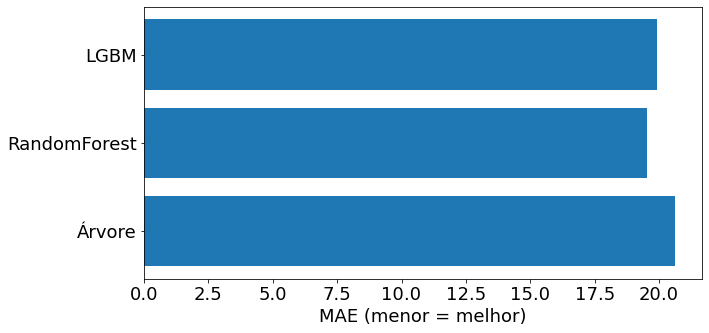

In [243]:
plt.figure(figsize=(10,5))
plt.barh(*zip(*avaliacao.items()))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('MAE (menor = melhor)',size=18)
plt.show()

Pelo gráfico acima, o modelo que parece ter sido o melhor com os hiperparâmetros usados é o RandomForest! Então vamos escolher este modelo para otimização

Seleção de variáveis: inferindo a janela ideal de defasagem
Na grande maioria dos problemas de séries temporais, as bases de dados não são tão grandes assim, exceto em casos em que a captura de dados é muito alta (dados em segundos, milisegundos, etc.) Entretanto, dependendo do cenário, podemos ter bases de dados com muitas features

In [244]:
# Vamos definir uma função de dataprep

def dataprep(base, defasagem_passado, defasagem_futuro):
    # Partindo da nossa base inicial (dados diarios)
    b1 = base.copy()
    # Eliminando missings
    b2 = b1.dropna()
    # Vamos construir features até defasagem_passado períodos atrás
    b3 = constroi_features_defasadas(b2,['Open', 'High', 'Low','Volume', 'Change Pct'],defasagem_passado)
    # E também uma variável target nos defasagem_futuro períodos seguintes
    b4 = construcao_target(b3,'Close',defasagem_futuro)
    return b4.dropna()

In [245]:
# testando alguns tamanhos de base
for i in [10,15,20,30,45,60]:
    base_prep = dataprep(boi_br,i,15)
    print('Número de features com '+str(i)+' defasagens: {}'.format(base_prep.shape[-1]))

Número de features com 10 defasagens: 57
Número de features com 15 defasagens: 82
Número de features com 20 defasagens: 107
Número de features com 30 defasagens: 157
Número de features com 45 defasagens: 232
Número de features com 60 defasagens: 307


Até mesmo pensando em implantação de modelos, muitas features podem tornar o modelo pesado e complexo, então de alguma maneira temos que fazer uma seleção de variáveis baseada nos resultados que temos. Uma forma bacana é analisarmos se nossa performance melhora muito na medida em que usamos mais features para o modelo



In [246]:
avaliacao = []
for i in range(15,90,15): # Testando de 15 a 90 dias de defasagem, variando de 15 em 15
    # Prepara a base
    base_avaliacao = dataprep(boi_br,i,15) # i defasagens para trás, 30 para frente
    X = base_avaliacao.drop('target',axis=1)
    y = base_avaliacao.target
    X_train = X[X.index<=corte_treino_teste]
    X_test = X[X.index>corte_treino_teste]
    y_train = y[y.index<=corte_treino_teste]
    y_test = y[y.index>corte_treino_teste]
    score = cross_val_score(LGBMRegressor(max_depth=5), # Escolhendo o nosso modelo da vez
                            X_train, y_train, # Nossos dados, excluindo o teste
                            cv=TimeSeriesSplit(n_splits=5), # Validação cruzada temporal
                            scoring='neg_mean_absolute_error', # Usando a métrica MAE
                            n_jobs=8 # Número de processadores, só para ir mais rápido
                           ).mean() # Tirando a média de todos os folds
    avaliacao.append((i,-score))


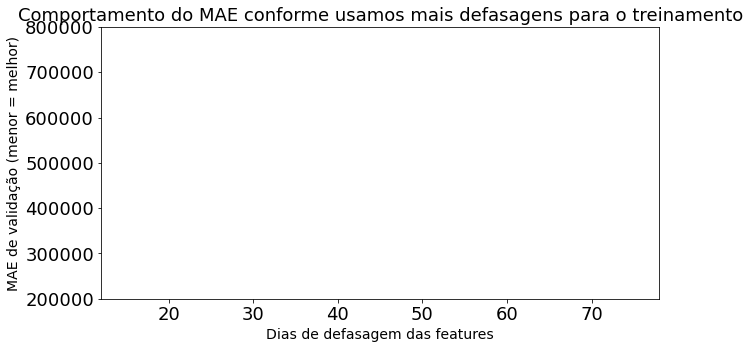

In [247]:
# Exemplo de bases com muitas features
plt.figure(figsize=(10,5))
plt.plot(*zip(*avaliacao))
plt.xlabel('Dias de defasagem das features',size=14)
plt.ylabel('MAE de validação (menor = melhor)',size=14)
plt.ylim([200000,800000])
plt.title('Comportamento do MAE conforme usamos mais defasagens para o treinamento',size=18)
plt.show()

In [248]:
avaliacao

[(15, 19.921157179444272),
 (30, 21.50675846951176),
 (45, 22.338955198487906),
 (60, 24.01051840865509),
 (75, 23.796645440427756)]

Pelo gráfico acima, vemos que usando mais features defasadas não ganhamos tanta performance. Sendo assim, vamos travar 15 dias

In [249]:
base_final = dataprep(boi_br,15,15)
X = base_final.drop('target',axis=1)
y = base_final.target

# Temos quatro anos na base (2019-2022), então iremos separar os últimos 9 meses para teste
corte_treino_teste = '2022-01-01'

X_train = X[X.index<=corte_treino_teste]
X_test = X[X.index>corte_treino_teste]

y_train = y[y.index<=corte_treino_teste]
y_test = y[y.index>corte_treino_teste]

print('Tamanho do treino '+str(len(X_train)))
print('Tamanho do teste '+str(len(X_test)))

Tamanho do treino 515
Tamanho do teste 146


A escolha da métrica: comparações relativas
Um dos pontos mais importantes da validação cruzada de séries temporais é a escolha da métrica. Isso importa bastante pois o tamanho do conjunto de treino varia a cada iteração

Vamos avaliar isso usando o cross_val_score

In [250]:
scores = -cross_val_score(LGBMRegressor(), # Escolhendo o nosso modelo da vez
                    X_train, y_train, # Nossos dados, excluindo o teste
                    cv=TimeSeriesSplit(n_splits=10), # Validação cruzada temporal
                    scoring='neg_mean_absolute_error', # Usando a métrica MAE
                   n_jobs=8 # Número de processadores, para rodar mais rápido
                         ) # Tirando a média de todos os folds


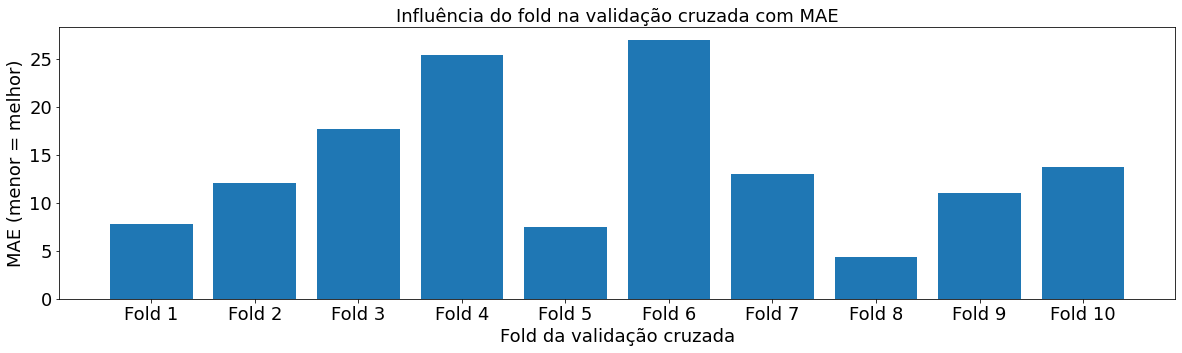

In [251]:
plt.figure(figsize=(20,5))
plt.bar(height=scores,x=['Fold '+str(i) for i in range(1,11)])
plt.xlabel('Fold da validação cruzada',size=18)
plt.ylabel('MAE (menor = melhor)',size=18)
plt.title('Influência do fold na validação cruzada com MAE',size=18)
plt.show()

De alguma maneira, quanto menos dados temos para treinar o modelo, mais underfitting teremos, e a nossa métrica precisa ser robusta a isso para evitarmos conclusões incorretas!
Uma solução simples para isso é comparar a nossa métrica com a métrica de um modelo de base. No caso do r2_score, o modelo de base é uma média simples da variável resposta. Vamos então calcular para todos os dados a média móvel do período de defasagem para o passado, e usar a métrica deste modelo "simples" para avaliar o nosso!

In [252]:
y_mediamovel = y_test.rolling(window=15,closed='left').mean().dropna() #Eliminando dias sem média móvel

# Selecionando para validação os mesmos índices
X_valid = X.loc[y_mediamovel.index]
y_valid = y.loc[y_mediamovel.index]


Vamos agora repetir a validação cruzada com Time Series, agora comparando nossa métrica com a da média móvel

In [253]:
X_valid

,Open,High,Low,Close,Volume,Change Pct,Open_def_1,Open_def_2,Open_def_3,Open_def_4,...,Change Pct_def_6,Change Pct_def_7,Change Pct_def_8,Change Pct_def_9,Change Pct_def_10,Change Pct_def_11,Change Pct_def_12,Change Pct_def_13,Change Pct_def_14,Change Pct_def_15
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-24,337.50,337.50,336.00,337.20,8,0.76,334.80,335.50,336.30,337.00,...,-0.24,0.55,-0.45,-0.40,0.93,0.11,0.30,-2.27,0.04,0.06
2022-01-25,337.05,338.35,336.95,337.95,12,0.22,337.50,334.80,335.50,336.30,...,0.99,-0.24,0.55,-0.45,-0.40,0.93,0.11,0.30,-2.27,0.04
2022-01-26,338.95,339.80,337.05,337.50,2,-0.13,337.05,337.50,334.80,335.50,...,0.68,0.99,-0.24,0.55,-0.45,-0.40,0.93,0.11,0.30,-2.27
2022-01-27,337.50,337.85,336.50,337.05,328,-0.13,338.95,337.05,337.50,334.80,...,-1.20,0.68,0.99,-0.24,0.55,-0.45,-0.40,0.93,0.11,0.30
2022-01-28,337.55,337.55,336.00,336.10,191,-0.28,337.50,338.95,337.05,337.50,...,-0.42,-1.20,0.68,0.99,-0.24,0.55,-0.45,-0.40,0.93,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26,322.95,324.00,322.75,323.00,391,0.72,319.05,320.85,322.15,323.95,...,0.99,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37,-0.73,0.88
2022-07-27,323.05,323.05,319.55,319.25,53,-1.16,322.95,319.05,320.85,322.15,...,-0.99,0.99,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37,-0.73
2022-07-28,320.00,322.35,318.70,322.35,4,0.97,323.05,322.95,319.05,320.85,...,-0.38,-0.99,0.99,-0.47,0.12,-1.09,-0.15,-0.62,-0.20,-0.37


In [254]:
metricas = []
for index_train, index_test in TimeSeriesSplit(n_splits=10).split(X_valid,y_valid):
    # Dados de treino
    x_tr = X_valid.iloc[index_train]
    y_tr = y_valid.iloc[index_train]
    x_te = X_valid.iloc[index_test]
    y_te = y_valid.iloc[index_test]
    y_mdmv = y_mediamovel[index_test]
    # Treinando um modelo e ajustando aos dados de treino
    model = LGBMRegressor().fit(x_tr,y_tr)
    # Prevendo nos dados de teste
    y_pr = model.predict(x_te)
    # Calculando a métrica (MAE) no teste 
    mae_model = mean_absolute_error(y_te,y_pr)
    mae_mdmv = mean_absolute_error(y_te,y_mdmv)
    mae_relativo = mae_model/mae_mdmv
    metricas.append(mae_relativo)

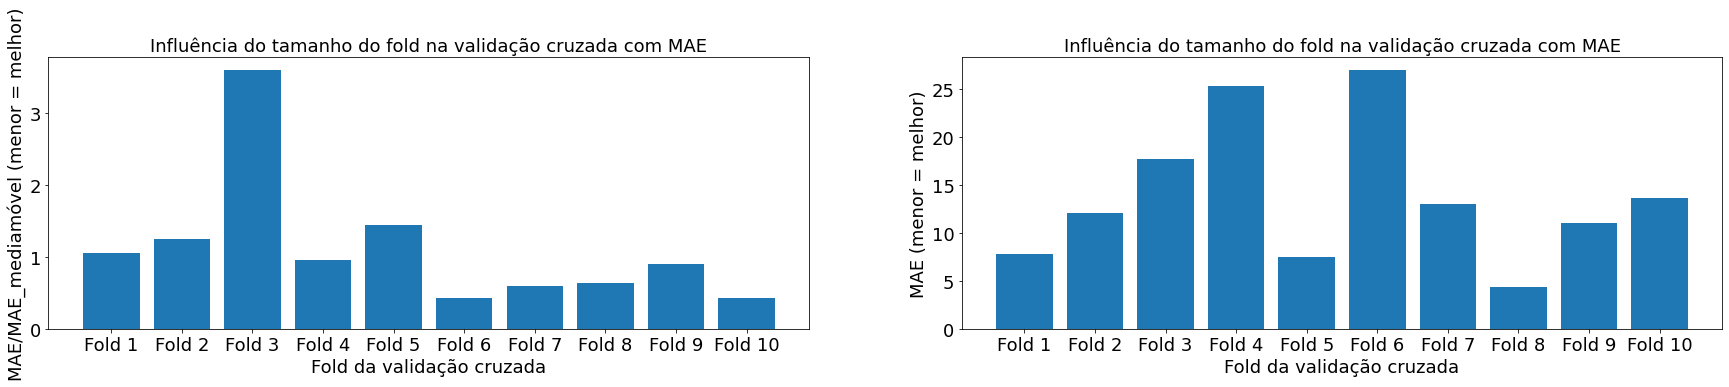

In [255]:
fig, ax = plt.subplots(1,2, figsize=(30,5))
ax[0].bar(height=metricas,x=['Fold '+str(i) for i in range(1,11)])
ax[0].set_xlabel('Fold da validação cruzada',size=18)
ax[0].set_ylabel('MAE/MAE_mediamóvel (menor = melhor)',size=18)
ax[0].set_title('Influência do tamanho do fold na validação cruzada com MAE',size=18)
ax[1].bar(height=scores,x=['Fold '+str(i) for i in range(1,11)])
ax[1].set_xlabel('Fold da validação cruzada',size=18)
ax[1].set_ylabel('MAE (menor = melhor)',size=18)
ax[1].set_title('Influência do tamanho do fold na validação cruzada com MAE',size=18)
plt.show()

Otimização de Hiperparâmetros e modelo final
Agora com nosso modelo escolhido, vamos otimizar os hiperparâmetros e plotar nosso modelo final! Para isso, vamos usar o GridSearchCV específico para o RandomForestRegressor

param_grid = {
'learning_rate':[.1,.15,.2,.25,.3],
'n_estimators':[10,100,150,200,300],
'num_leaves':[20,220,260,300,400]
}


In [256]:
 param_grid = {'n_estimators': [100,300,500, 700, 1000], 'max_depth': [None, 1, 2, 3, 5], 'min_samples_split': [1, 2, 3, 5]}

In [257]:
#instanciar o modelo

In [258]:
from sklearn.model_selection import GridSearchCV

In [259]:
rcv = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,cv=TimeSeriesSplit(n_splits=3),
                        scoring='neg_mean_absolute_error',verbose=True,n_jobs=8)
rcv.fit(X,y)

rcv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [260]:
melhores_parametros = {'n_estimators': 500, 'max_depth': None, 'min_samples_split':2}

In [261]:
modelo = RandomForestRegressor(**melhores_parametros).fit(X_train,y_train)
y_pred_final = pd.Series(modelo.predict(X),index=X.index)

<AxesSubplot:xlabel='Date'>

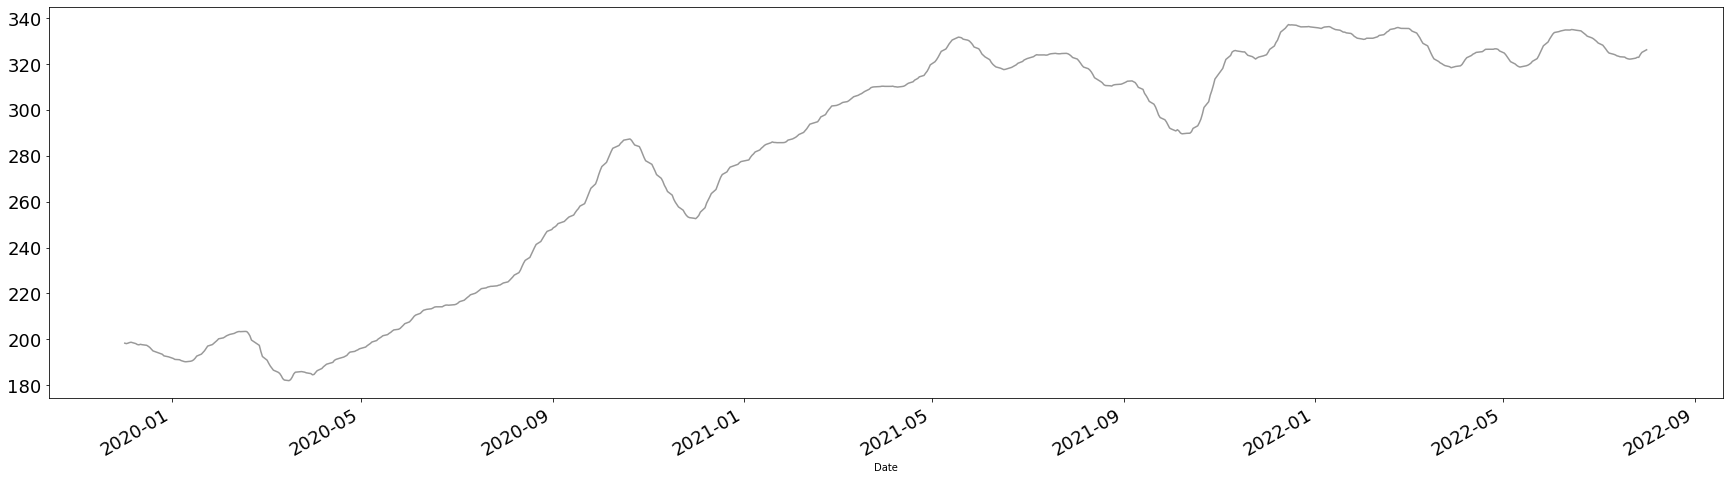

In [262]:
plt.figure(figsize=(30,8))
y.plot(c='grey',alpha=0.8) # Dados reais

In [263]:
# Plotando os dados de treino e teste para 1 meses do conjunto de teste

In [264]:
x_pl = X[(X.index>='2022-02-01') & (X.index<='2022-03-01')]

y_plot = y[x_pl.index]
y_preds = y_pred_final[x_pl.index]
y_mdmv_plot = y_mediamovel[x_pl.index]

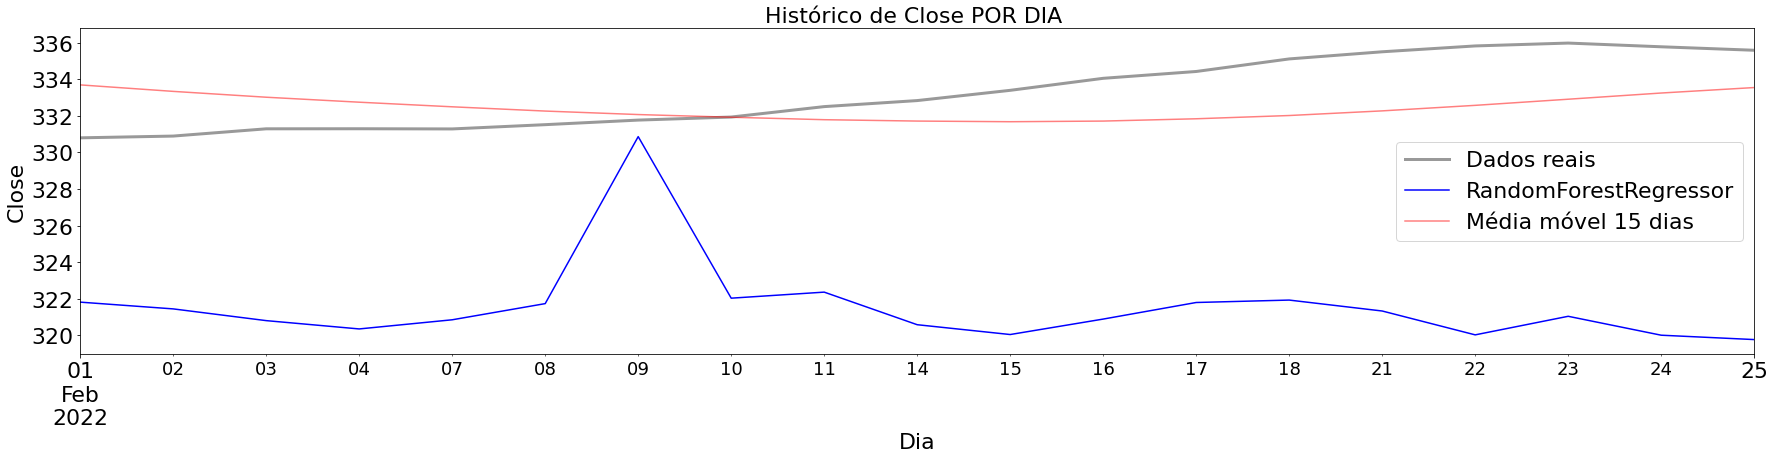

In [266]:
plt.figure(figsize=(30,6))
y_plot.plot(c='grey',alpha=0.8,linewidth=3) # Dados reais
y_preds.plot(c='blue') # Dados reais
y_mdmv_plot.plot(c='red',alpha=0.5) # Dados reais
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Dia',size=22)
plt.ylabel('Close',size=22)
plt.title('Histórico de Close POR DIA ',size=22)
plt.legend(['Dados reais','RandomForestRegressor','Média móvel 15 dias'],fontsize=22)
plt.show()

In [267]:
y_train_pred = modelo.predict(X_train)
print('Performance do melhor RandomForestRegressor no treino')
print(mean_absolute_error(y_train,y_train_pred))
# Calculando a métrica no teste
y_test_pred = modelo.predict(X_test)
print('Performance do melhor RandomForestRegressor no teste')
print(mean_absolute_error(y_test,y_test_pred))

Performance do melhor RandomForestRegressor no treino
1.1446241165048774
Performance do melhor RandomForestRegressor no teste
4.81051511642849


Não tivemos uma performace boa com o LGBMRegressor

In [268]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM # Long Short Term Memory
from keras.layers import Bidirectional
from keras.layers import Dropout # Regularização
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping # Regularização

Usando o Keras, podemos construir uma rede neural adicionando camadas uma após a outra, de forma que no fim o modelo irá treinar os melhores pesos que resolvem o nosso problema. Apenas para recapitular:

Construímos nossa variável resposta como sendo o valor médio de notionalusd_ipca 30 dias seguintes
Consideramos features 45 anteriores
Até o momento, nenhum modelo entende que essa ordem existe
Quando adicionamos uma camada LSTM(Long Short Term Memory) à rede neural, estamos dizendo que a ordem dos dados deve afetar a resposta, poranto iremos ganhar uma nova camada de impacto em relação aos demais modelos

Para treinar um modelo no Keras, por ser uma rede neural, temos que fazer mais dois tratamentos:

Escala dos dados, pois não é um modelo robusto a escala
Adicionar uma dimensão (para se tornar um tensor), mesmo que tenha dimensão 1

In [269]:
# Treinando um escalador
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
X_test_sc = sc.transform(X_test).reshape(X_test.shape[0],1,X_test.shape[1])

No keras, primeiro instanciamos nosso objeto Rede Neural, para então treiná-lo. Para isso, temos que definir algumas coisas:

Quantas (e quais) camadas nossa rede terá, usando o comando .add()
Compilar a rede (i.e., 'juntar' as camadas, definindo uma função custo e uma otimização, usando o comando .compile()

In [270]:
# Construindo a estrutura da rede neural
callback = EarlyStopping(monitor='val_loss', patience=3)

model = Sequential() # Vamos construir uma rede sequencial
model.add(
    Bidirectional(LSTM(units=50,input_shape=(X_train_sc.shape[1],X_train_sc.shape[2]))) # Camada LSTM (com memória), bidirecional!
) # Camada de rede neural com memória
model.add(Dropout(rate=0.2)) # Camada de 'esquecimento' de atualização de pesos, para regularização!
model.add(Dense(1)) # Adicionando uma camada que resulta em um output (variável resposta) único
model.compile(loss='mae', optimizer='adam') # Vou minimizar a o MAE, usando a técnica Adam

Aqui vamos usar um modo em que o modelo nos diz a função custo a cada iteração

In [271]:
# fit network
history = model.fit(
    X_train_sc, y_train, # Dados de treino
    epochs=50, # Número de iterações, i.e., quantas vezes irei atualizar os coeficientes
    batch_size=36, # Tamanho dos dados de entrada a cada iteração
    validation_data=(X_test_sc, y_test), # Dados que o modelo já usará para a validação
    verbose=2, # Forma de apresentar os resultados parciais
    shuffle=False, # Como os dados são temporais, não posso embaralhar!
    callbacks=[callback] # Critérios de parada
)


Epoch 1/50
15/15 - 5s - loss: 266.2430 - val_loss: 328.0614 - 5s/epoch - 328ms/step
Epoch 2/50
15/15 - 0s - loss: 265.3504 - val_loss: 326.9422 - 59ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 264.5783 - val_loss: 325.9450 - 51ms/epoch - 3ms/step
Epoch 4/50
15/15 - 0s - loss: 263.7189 - val_loss: 324.9793 - 52ms/epoch - 3ms/step
Epoch 5/50
15/15 - 0s - loss: 262.8110 - val_loss: 324.0828 - 54ms/epoch - 4ms/step
Epoch 6/50
15/15 - 0s - loss: 261.9944 - val_loss: 323.2903 - 51ms/epoch - 3ms/step
Epoch 7/50
15/15 - 0s - loss: 261.2481 - val_loss: 322.6120 - 50ms/epoch - 3ms/step
Epoch 8/50
15/15 - 0s - loss: 260.5693 - val_loss: 322.0288 - 51ms/epoch - 3ms/step
Epoch 9/50
15/15 - 0s - loss: 260.0104 - val_loss: 321.5010 - 50ms/epoch - 3ms/step
Epoch 10/50
15/15 - 0s - loss: 259.4397 - val_loss: 321.0038 - 51ms/epoch - 3ms/step
Epoch 11/50
15/15 - 0s - loss: 258.8757 - val_loss: 320.5254 - 51ms/epoch - 3ms/step
Epoch 12/50
15/15 - 0s - loss: 258.3790 - val_loss: 320.0609 - 54ms/epoch 

Plotar a função custo (MAE), no treino e no teste, ao longo das iterações

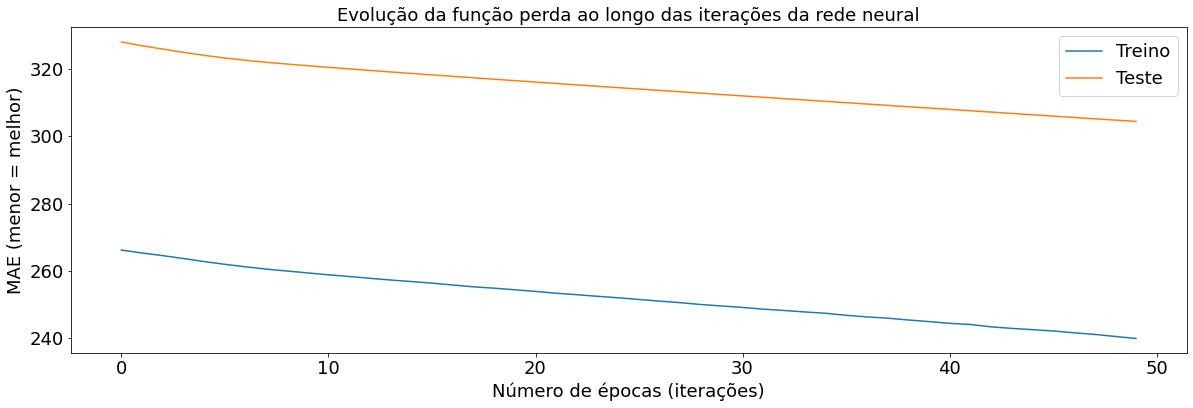

In [272]:
# plot history
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Número de épocas (iterações)',size=18)
plt.ylabel('MAE (menor = melhor)',size=18)
plt.title('Evolução da função perda ao longo das iterações da rede neural',size=18)
plt.legend(['Treino','Teste'],fontsize=18)
plt.show()

Para fazer previsões, usamos o .predict(), similar aos modelos em scikit-learn

In [273]:
y_pred_nn_train = model.predict(X_train_sc)
y_pred_nn_test = model.predict(X_test_sc)

5/5 [==============================] - 0s 2ms/step


In [274]:
X_train['pred_nn'] = y_pred_nn_train
X_test['pred_nn'] = y_pred_nn_test
# Prevendo o modelo
y_pred_nn_train = X_train['pred_nn']
y_pred_nn_test = X_test['pred_nn']
# Eliminando colunas auxiliares
X_train.drop('pred_nn',axis=1,inplace=True)
X_test.drop('pred_nn',axis=1,inplace=True)

Vamos comparar essa nova performance do modelo LSTM com as que já tínhamos

In [275]:
mae_mdmv = mean_absolute_error(y_valid,y_mediamovel)
y_lstm = pd.Series(y_test_pred,index=y_test.index)
mae_lgbm = mean_absolute_error(y_valid,y_lstm[y_valid.index])
mae_nn = mean_absolute_error(y_valid,y_pred_nn_test[y_valid.index])

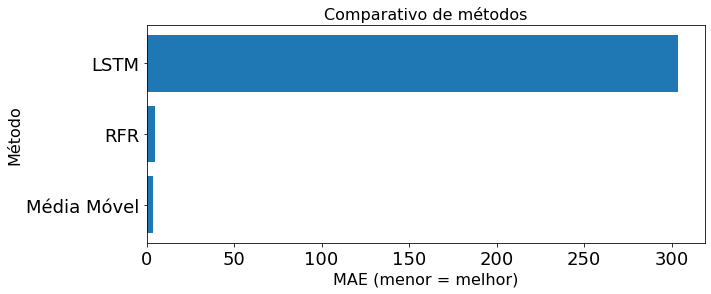

In [276]:
# Plotando os gráficos
performances = [mae_mdmv,mae_lgbm,mae_nn]
plt.figure(figsize=(10,4))
plt.barh(['Média Móvel','RFR','LSTM'],performances)
plt.ylabel('Método',size=16)
plt.xlabel('MAE (menor = melhor)',size=16)
plt.title('Comparativo de métodos',size=16)
plt.show()

Vamos complementar nosso plot com a rede neural

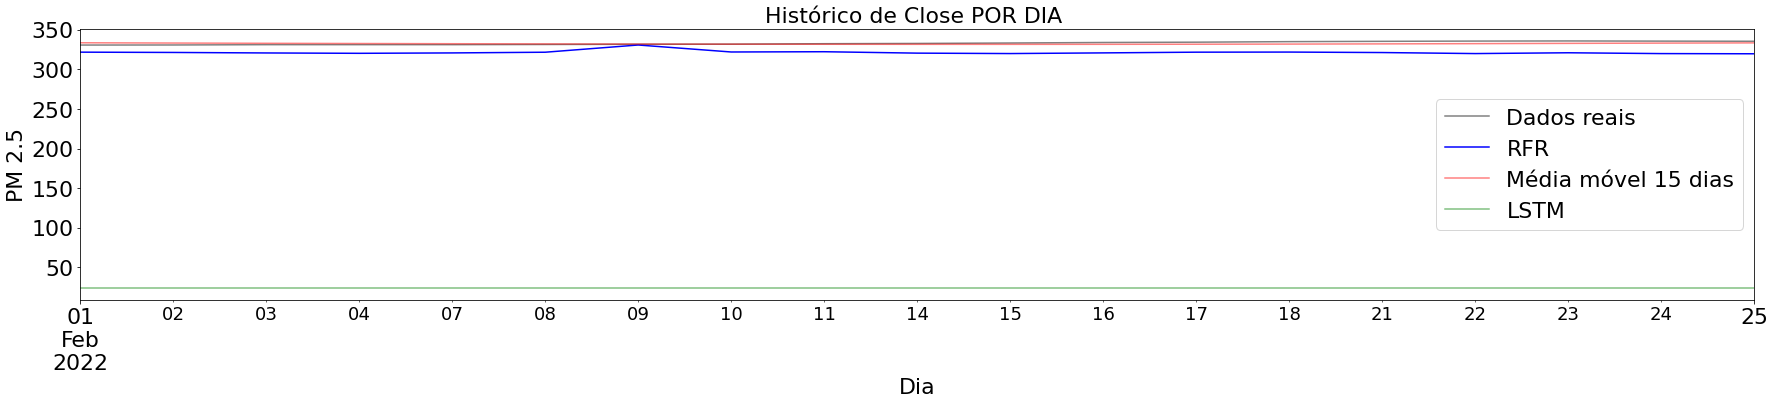

In [278]:
y_nn_plot = y_pred_nn_test[x_pl.index]

plt.figure(figsize=(30,5))
y_plot.plot(c='grey') # Dados reais
y_preds.plot(c='blue') # Dados reais
y_mdmv_plot.plot(c='red',alpha=0.5) # Dados reais
y_nn_plot.plot(c='green',alpha=0.5) # Dados reais
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Dia',size=22)
plt.ylabel('PM 2.5',size=22)
plt.title('Histórico de Close POR DIA ',size=22)
plt.legend(['Dados reais','RFR','Média móvel 15 dias','LSTM'],fontsize=22)
plt.show()